<a href="https://colab.research.google.com/github/gifale95/RNC/blob/main/tutorials/multivariate_rnc_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Relational Neural Control (RNC)

## Theoretical background

Human vision is mediated by a complex interconnected network of cortical brain areas that jointly represent visual information. While these areas are increasingly well understood in isolation, their representational relationships remain elusive: what representational content is shared between areas or unique to a specific area? Here we determined representational relationships by developing [Relational Neural Control (RNC)][rnc_website]. RNC generates and explores in silico functional magnetic resonance imaging (fMRI) responses for large amounts of images, finding controlling images that align or disentangle responses across areas, under the assumption that alignment or disentanglement are indicative of shared or unique representational content, respectively. Together, this reveals how visual areas jointly represent the world as an interconnected network.

## Tutorial content

In this tutorial you will learn how to use **multivariate RNC**, an RNC variant that controls in silico **multivariate** fMRI responses (i.e., population response of all voxels within a ROI), thus exploring representational relationships for visual information encoded in the multi-voxel response patterns.

To thoroughly explore the visual space in search for controlling stimuli, you will apply RNC to *in silico* neural responses for thousands of images, that is, neural responses generated through encoding models ([Naselaris et al., 2011][2011_naselaris]; [Wu et al., 2006][2006_wu]; [Yamins & DiCarlo, 2016][2016_yamins]). Specifically, you will use pre-generated in silico fMRI responses form the [Neural Encoding Dataset (NED)][ned_website]: encoding-model-generated fMRI responses for ~150,000 naturalistic images coming from the [Natural Scenes Dataset][nsd] ([Allen et al., 2022][allen]), the [ImageNet 2012 Challenge][imagenet] ([Russakovsky et al., 2015][russakovsky]), and the [THINGS Database][things] ([Hebart et al., 2019][hebart]).

<font color='red'><b>NOTE:</b></font> **Beyond familiarizing you with RNC, this tutorial and data can also be used for exploratory research and new discovery, while keeping in mind that the correctness of any finding should then be established through validation on _in-vivo_ fMRI responses.**

## Additional tutorial information

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. The running time of the tutorial ranges from 15 minutes to several hour, depending on the data algorithmic parameters used (however, the running time is of around 45 minutes with default data and parameters).

If you experience problems with the code please get in touch with Ale (alessandro.gifford@gmail.com).

For more information on RNC, please see our paper _[In silico discovery of representational relationships across visual cortex][paper_doi]_.

## Citations

If you use code and/or data from this tutorial, please cite:

> * Gifford AT, Jastrzębowska MA, Singer JJD, Cichy RM. 2024. In silico discovery of representational relationships across visual cortex. _In preparation_
> * Gifford AT, Cichy RM. 2024. The Neural Encoding Dataset. _In preparation_. https://github.com/gifale95/NED

[rnc_website]: https://www.alegifford.com/projects/rnc/
[ned_website]: https://www.alegifford.com/projects/ned/
[2011_naselaris]: https://doi.org/10.1016/j.neuroimage.2010.07.073
[2006_wu]: https://doi.org/10.1146/annurev.neuro.29.051605.113024
[2016_yamins]: https://doi.org/10.1038/nn.4244
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[russakovsky]: https://link.springer.com/article/10.1007/s11263-015-0816-y
[things]: https://things-initiative.org/
[hebart]: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0223792
[nsd]: https://naturalscenesdataset.org/
[allen]: https://www.nature.com/articles/s41593-021-00962-x
[colab]: https://colab.research.google.com/drive/1bEKCzkjNfM-jzxRj-JX2zxB17XBouw23?usp=sharing
[jupyter]: https://github.com/gifale95/RNC/tutorials/multivariate_rnc_tutorial.ipynb
[paper_doi]: !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access NED` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this: you only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [ ]:
platform = "colab" # @param ["colab", "jupyter_notebook"] {allow-input: true}

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NED toolbox][ned_git].

[ned_git]: https://github.com/gifale95/NED

In [ ]:
!pip install -U git+https://github.com/gifale95/NED.git

  Cloning https://github.com/gifale95/NED.git to /tmp/pip-req-build-0g7954k6
  Running command git clone --filter=blob:none --quiet https://github.com/gifale95/NED.git /tmp/pip-req-build-0g7954k6
  Resolved https://github.com/gifale95/NED.git to commit 01b8eabe0fb7ef821dcd76908bc83e3c603d996f
  Preparing metadata (setup.py) ... done
  Created wheel for NED: filename=NED-0.2.1-py3-none-any.whl size=47126 sha256=f41da068ecf631486c53487d594ddc37d1fcdc69e04d90e109c9a192d1282c4b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpz9zcjh/wheels/85/83/46/b8111e13e7857a1263e10d2a531fdedba00dc665a1d660c955
Successfully built NED


### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [jupyter][jupyter], [matplotlib][matplotlib], [ned][ned_git], [numpy][numpy], [pillow][pil], [sklearn][sklearn], [torchvision][torchvision], [tqdm][tqdm].

[h5py]: https://docs.h5py.org/en/stable/
[jupyter]: https://jupyter.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[ned_git]: https://github.com/gifale95/NED
[numpy]: https://numpy.org/
[pil]: https://pypi.org/project/pillow/
[sklearn]: https://scikit-learn.org/stable/#
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://github.com/tqdm/tqdm

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [ ]:
from copy import copy
import h5py
import os
import matplotlib
from matplotlib import pyplot as plt
from ned.ned import NED
from PIL import Image
import numpy as np
import random
from scipy.stats import pearsonr
from sklearn.utils import resample
import torchvision
from torchvision import transforms as trn
from tqdm import tqdm

## 0.2 | Access NED

### 0.2.1 | Access NED on Google Colab

If you are running the tutorial on Google Colab you can use NED from the Google Drive public folder called [`neural_encoding_dataset`][ned]. Before running the tutorial code you need to right-click on this folder, and select `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can read the content after mounting using `drive.mount()`. Finally, edit the `ned_dir` variable below with the path on your Drive to the `neural_encoding_dataset` shortcut folder.

<font color='red'><b>NOTE:</b></font> **You need to manually create the data shortcut yourself, as the code cell below won't do this for you.**

[ned]: https://forms.gle/ZKxEcjBmdYL6zdrg9

In [ ]:
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    ned_dir = '/content/drive/MyDrive/neural_encoding_dataset' #@param {type:"string"}

Mounted at /content/drive/


### 0.2.2 | Access NED on Jupyter Notebook

If you are running the tutorial on Jupyter Notebook you first need to download NED from the public Google Drive folder [`neural_encoding_dataset`][data], and then edit the `ned_dir` variable below with the path to the downloaded (unzipped) data folder.

Note that the `neural_encoding_dataset` folder contains several hundred GBs of data, and thus the download might take a while. However, based on your needs you might only choose to download a part of the dataset. [NED's data manual][ned_manual] provides a detailed description of NED's content, which will help you in this choice.

We recommend downloading the dataset directly from Google Drive via terminal using [Rclone][rclone]. [Here][guide] is a step-by-step guide for how to install and use Rclone to move files to and from your Google Drive. Before downloading NED via terminal you need to add a shortcut of the `neural_encoding_dataset` folder to your Google Drive. You can do this by right-clicking on the `neural_encoding_dataset` folder, and selecting `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can download its content.

[data]: https://forms.gle/ZKxEcjBmdYL6zdrg9
[ned_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj
[rclone]: https://rclone.org/
[guide]: https://noisyneuron.github.io/nyu-hpc/transfer.html

In [ ]:
if platform == 'jupyter_notebook':
    ned_dir = '../neural_encoding_dataset' #@param {type:"string"}

### 0.2.3 | Initialize the NED object

You will use the `ned_dir` variable to initialize the NED object, which provides utility functions for interacting with the Neural Encoding Dataset.

In [ ]:
ned_object = NED(ned_dir)

# 1 | Load and visualize the data

Before applying RNC, you will load and visualize NED's in silico fMRI responses, along with the corresponding images, and familiarize yourself with these data. This section 1 will help you better understand the data on which RNC is applied in section 2. However, once you are familiar with the data, you can skip section 1 altogether and directly apply RNC in section 2.

NED's in silico fMRI responses were generated using encoding models trained on single-trial fMRI betas from the [Natural Scenes Dataset (NSD)][nsd] ([Allen et al., 2022][allen]), a large-scale dataset of high-quality 7T fMRI responses from 8 subjects who each viewed 9,000–10,000 distinct color natural scenes. The encoding models consisted of the feature-weighted receptive field (fwRF), a convolutional neural network trained end-to-end to predict fMRI responses to images ([St-Yves & Naselaris, 2018][styves]; [Allen et al., 2022][allen]).

A separate encoding model was trained for each of the 8 NSD subjects, and for each of the following 23 visual ROIs (for more information on how these ROIs were defined in the NSD,  consult the [NSD data manual][nsd_man]):
* **Early retinotopic visual regions:** V1, V2, V3, hV4.
* **Body-selective regions:** EBA, FBA-2.
* **Face-selective regions:** OFA, FFA-1, FFA-2.
* **Place-selective regions:** OPA, PPA, RSC.
* **Word-selective regions:** OWFA, VWFA-1, VWFA-2, mfs-words.
* **Anatomical streams:** early, midventral, midlateral, midparietal, ventral, lateral, parietal.

The trained encoding models were then used to generate fMRI responses for the following image sets:
* **[NSD][nsd]:** 73,000 images from NSD, consisting of naturalistic scenes from the [COCO database][coco].
* **[ImageNet Val][imagenet]:** 50,000 images from the ILSVRC-2012 validation split, consisting of objects on natural backgrounds.
* **[THINGS][things]:** 26,107 images from the THINGS database, consisting of objects on natural backgrounds.

For each subject and ROI, this resulted in in silico fMRI responses for all images of each image set.

<font color='red'><b>NOTE:</b></font> **The in silico fMRI responses for NSD, ImageNet and THINGS images all come from encoding models trained on NSD. Therefore, regardless of the chosen image set, the in silico fMRI responses are generated by encoding models trained on the 8 NSD subjects' images and corresponding fMRI responses, using the 23 NSD visual ROIs.**

For more information on NED's encoding models and in silico neural responses, see [NED's data manual][ned_manual].

[nsd]: https://naturalscenesdataset.org/
[styves]: https://doi.org/10.1016/j.neuroimage.2017.06.035
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[things]: https://things-initiative.org/
[allen]: https://www.nature.com/articles/s41593-021-00962-x
[nsd_man]: https://cvnlab.slite.page/p/X_7BBMgghj/ROIs
[coco]: https://cocodataset.org/#home
[ned_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj

## 1.1 | Data selection

Here you can choose the subject, ROI and image set of the in silico fMRI responses.

In [ ]:
# Choose subject
sub = 1 # @param ["1", "2", "3", "4", "5", "6", "7", "8"] {type:"raw", allow-input: true}
print('Subject: ' + str(sub))

# Choose ROI
roi = "V1" # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
print('ROI: ' + roi)

# Choose image set
imageset = "nsd" # @param ["nsd", "imagenet_val", "things"] {allow-input: true}
print('Image set: ' + imageset)

Subject: 1
ROI: V1
Image set: nsd


## 1.2 | Plot the encoding models encoding accuracy

Here you will plot the encoding accuracy of the encoding models of the selected subject and ROI.

For each NSD subject and ROI, one encoding models was trained using the (up to) 9000 non-shared images (i.e., the images uniquely seen by each subject), and tested them on 515 (out of 1000) shared images (i.e., the 515 images that each subject saw for exactly three times). We used the trained encoding models to generate in silico fMRI responses for the 515 test images, and compared these in silico responses to the ground truth (real) fMRI responses through a Pearson's correlation. We correlated ground-truth and in silico fMRI responses independently for each voxel (across the 515 test images), and squared the correlation scores resulting in one explained variance score (*r*²) for each voxel. Finally, we normalized the *r*² scores through division with the noise ceiling (i.e., the maximal explainable variance given the noise in the data), obtaining the noise-ceiling-normalized encoding accuracy for each voxel: this score indicates the percentage of explainable variance that has been accounted for by the encoding model.

You will first plot the mean noise-ceiling-normalized encoding accuracy (i.e., explained variance) across all voxels of the chosen ROI.

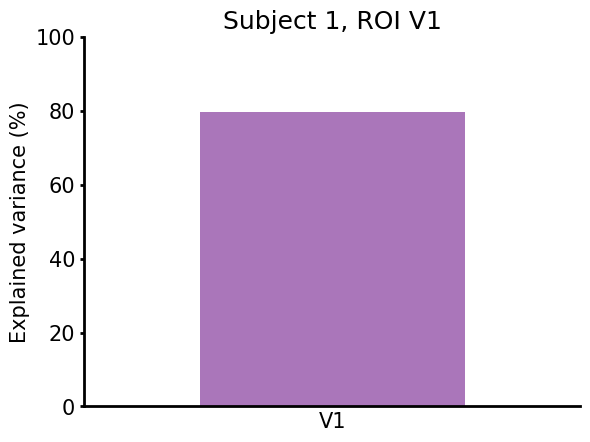

In [ ]:
# Load the encoding accuracy
metadata = ned_object.get_metadata(
    modality='fmri',
    train_dataset='nsd',
    model='fwrf',
    subject=sub,
    roi=roi
    )

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the mean noise-ceiling normalized encoding accuracy
encoding_acc = np.mean(metadata['encoding_models']['encoding_accuracy']\
    ['noise_normalized_encoding']) * 100
plt.plot()
plt.bar(1, encoding_acc, color=colors[0])
plt.ylabel('Explained variance (%)',
    fontsize=fontsize)
plt.ylim(bottom=0, top=100)
plt.xlabel(roi, fontsize=fontsize)
plt.xticks([])
plt.xlim(left=0.25, right=1.75);
title = 'Subject ' + str(sub) + ', ROI ' + roi
plt.title(title);

Here you will plot the voxel-wise encoding accuracy scores (*r*² scores) against the corresponding noise ceiling scores, on a scatterplot.

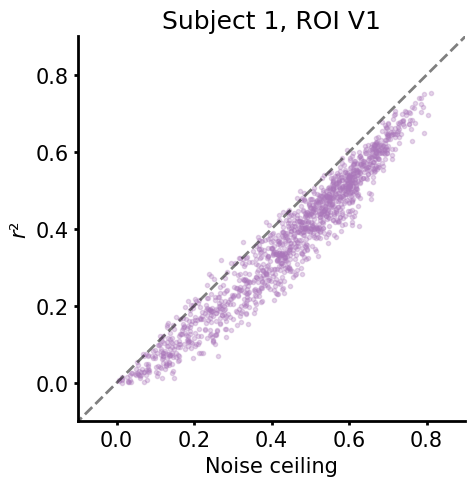

In [ ]:
r2 = metadata['encoding_models']['encoding_accuracy']['r2']
noise_ceiling = metadata['encoding_models']['encoding_accuracy']['noise_ceiling']

plt.figure(figsize=(5,5))
plt.plot(np.arange(-1,1.1,.1), np.arange(-1,1.1,.1), '--k', linewidth=2,
    alpha=.5)
plt.scatter(noise_ceiling, r2, color=colors[0], alpha=.3)
plt.ylabel('$r$²', fontsize=fontsize)
plt.ylim(bottom=-.1, top=.9)
plt.xlabel('Noise ceiling', fontsize=fontsize)
plt.xlim(left=-.1, right=.9);
title = 'Subject ' + str(sub) + ', ROI ' + roi
plt.title(title);

## 1.3 | Load the in silico fMRI responses

Now you will load and visualize the in silico fMRI responses and corresponding metadata using the [`load_insilico_neural_responses`][ned_git_func] function from [NED's Python package][ned_git].

The `load_insilico_neural_responses` function takes the following input parameters:
* `modality` (str): Data modality of the in silico neural responses. Here, we use 'fmri'.
* `train_dataset` (str): Dataset on which NED's encoding models are trained. Here, we use 'nsd'.
* `model` (str): trained encoding model type. Here, we use 'fwrf', which consists in the feature-weighted receptive field model introduced in ([St-Yves & Naselaris, 2018][fwrf]).
* `imageset` (str): Imageset for which the in silico fMRI responses are generated. If 'nsd', load in silico neural responses for the 73,000 NSD images. If 'imagenet_val', load in silico neural responses for the 50,000 ILSVRC-2012 validation images. If 'things', load in silico neural responses for the 26,107 images from the THINGS database.
* `subject` (int): Subject number for which the in silico fMRI image responses are generated.
* `roi` (str): Name of the Region of Interest (ROI) for which the fMRI image responses are generated.
* `return_metadata` (bool): If True, return fMRI medatata along with the in silico fMRI responses.

And returns the following variables:
* `insilico_fmri`: in silico fMRI responses organized in a 2-D array of shape (N images × M voxels), where the image dimension matches the image amount of the chosen image set.
* `metadata`: metadata related to the in silico fMRI responses.

[ned_git_func]: https://github.com/gifale95/NED/blob/main/ned/ned.py#L551
[ned_git]: https://github.com/gifale95/NED
[fwrf]: https://doi.org/10.1016/j.neuroimage.2017.06.035

In [ ]:
insilico_fmri, metadata = ned_object.load_insilico_neural_responses(
	modality='fmri',
	train_dataset='nsd',
	model='fwrf',
	imageset=imageset,
	subject=sub,
	roi=roi,
	return_metadata=True
	)

# Visualize the in silico fMRI data dimensions
print('In silico fMRI data shape:')
print(insilico_fmri.shape)
print('(Images × Voxels)')

In silico fMRI data shape:
(73000, 1350)
(Images × Voxels)


## 1.4 | Link the in silico fMRI responses to the corresponding images

Here you will match the in silico fMRI responses to the corresponding images. You will start by accessing the image sets. Since the [NSD][nsd], [ILSVRC-2012][imagenet], and [THINGS][things] image sets are organized following different directory structures, you will access each of them in a different way.

<font color='red'><b>NOTE:</b></font> **Prior to using the NSD images you are required to fill out the [NSD Data Access Agreement][nsd_access].**

[nsd_access]: https://forms.gle/eT4jHxaWwYUDEf2i9
[nsd]: https://naturalscenesdataset.org/
[imagenet]: https://www.image-net.org/challenges/LSVRC/2012/index.php
[things]: https://things-initiative.org/

In [ ]:
# Access the image sets
if imageset == 'nsd':
    imageset_dir = os.path.join(ned_dir,
        'pregenerated_insilico_neural_responses', 'imagesets', 'imageset-nsd',
        'nsd_stimuli.hdf5')
    images = h5py.File(imageset_dir, 'r')
    images = images.get('imgBrick')
elif imageset == 'imagenet_val':
    imageset_dir = os.path.join(ned_dir,
        'pregenerated_insilico_neural_responses', 'imagesets',
        'imageset-imagenet_val')
    images = torchvision.datasets.ImageNet(root=imageset_dir, split='val')
elif imageset == 'things':
    images = metadata['things_labels']['image_paths']

Here you can choose an image (indexing is zero-based), and link it to the corresponding in silico fMRI response.

In [ ]:
# Choose the image
if imageset == 'nsd':
    nsd_img = 0 # @param {type:"slider", min:0, max:72999, step:1}
    img_idx = nsd_img
elif imageset == 'imagenet_val':
    imagenet_img = 0 # @param {type:"slider", min:0, max:49999, step:1}
    img_idx = imagenet_img
elif imageset == 'things':
    things_img = 0 # @param {type:"slider", min:0, max:26106, step:1}
    img_idx = things_img

# Link the image to the corresponding in silico fMRI response
print('In silico fMRI image response shape:')
print(insilico_fmri[img_idx].shape)
print('(Voxels)')

In silico fMRI image response shape:
(1350,)
(Voxels)


And now you will load and visualize the image you chose, along with optional metadata (e.g., image category).

Since the ILSVRC-2012 images are rectangular, we center cropped them to square format prior to feeding them to encoding models to generate their corresponding in silico fMRI responses. Here you will apply the same center cropping when loading these images. The NSD and THINGS images are already in square format, and therefore do not require any cropping.

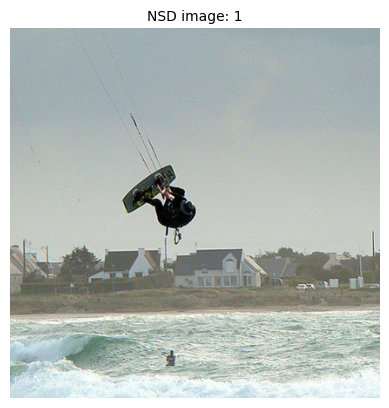

In [ ]:
# Load the selected image
if imageset == 'nsd':
    img = images[img_idx]
elif imageset == 'imagenet_val':
    img, _ = images.__getitem__(img_idx)
    transform = trn.Compose([trn.CenterCrop(min(img.size))])
    img = transform(img)
elif imageset == 'things':
    img_dir = os.path.join(ned_dir, 'pregenerated_insilico_neural_responses',
        'imagesets', 'imageset-things', 'images', images[img_idx])
    img = Image.open(img_dir).convert('RGB')

# Visualize the image (along with optional metadata)
plt.figure()
plt.axis('off')
plt.imshow(img)
if imageset == 'nsd':
    title = 'NSD image: ' + str(img_idx+1)
elif imageset == 'imagenet_val':
    label_number = metadata['imagenet_val_labels']['label_number'][img_idx]
    label_name = metadata['imagenet_val_labels']['label_names'][label_number]
    title = 'ILSVRC-2012 validation image: ' + str(img_idx+1) + \
        '\nCategory number: ' + str(label_number+1) + \
        '\nCategory name: ' + label_name
elif imageset == 'things':
    object_concept_number = \
        metadata['things_labels']['image_concept_index'][img_idx]
    object_concept_name = \
        metadata['things_labels']['unique_id'][object_concept_number]
    file_name = \
        metadata['things_labels']['image_paths'][img_idx]
    title = 'THINGS image: ' + str(img_idx+1) + \
        '\nObject concept number: ' + str(object_concept_number+1) + \
        '\nObject concept name: ' + object_concept_name + \
        '\nFile name: ' + file_name
plt.title(title, fontsize=10);

# 2 | Multivariate RNC

Now you will use multivariate RNC to investigate representational relationships between the multivariate responses of two ROIs of your choice, out of the 23 available visual ROIs (e.g., V1 vs. V4, FFA-1 vs. PPA, EBA vs. OWFA). To compare the in silico multivariate fMRI responses of two ROIs, you will first transform their responses into representational similarity matrices (RSMs) ([Kriegeskorte et al., 2008][kriegeskorte]). Next you will use genetic optimization ([Yamane et al., 2008][yamane]; [Vaziri et al., 2014][vaziri]; [Ponce et al., 2019][ponce]; [Xiao & Kreiman, 2020][xiao]) to search for a controlling image batch that aligns or disentangles the RSMs of the two ROIs being compared, as measured with representational similarity analysis (RSA) ([Kriegeskorte et al., 2008][kriegeskorte]), thus indicating shared or unique representational content, respectively.

Alignment consists in an image batch leading to a high RSA correlation score (i.e., Pearson's *r*) for the representational similarity matrices (RSMs) of the two ROIs. Disentanglement consists in an image batch leading to a low absolute RSA correlation score for the RSMs of the two ROIs.

You will apply multivariate RNC on the in silico fMRI responses of the 8 NSD subjects for images from one of three image sets (the 73,000 images from NSD, the 50,000 images from the ILSVRC-2012 validation split, or the 26,107 images from the THINGS database). You will use the in silico fMRI responses of a subset of these subjects to select the controlling images that either align or disentangle the multivariate responses of the two chosen ROIs. You will then cross-validate these controlling images on the in silico multivariate fMRI responses of the remaining subjects.

[yamane]: https://doi.org/10.1038/nn.2202
[vaziri]: https://doi.org/10.1016/j.neuron.2014.08.043
[ponce]: https://doi.org/10.1016/j.cell.2019.04.005
[xiao]: https://doi.org/10.1371/journal.pcbi.1007973
[kriegeskorte]: https://doi.org/10.3389/neuro.06.004.2008

## 2.0 | Multivariate RNC algorithmic description

![](https://drive.google.com/uc?export=view&id=1ojrApVmr24Qq0oBfHxyN65qXShAvsgzS)

Multivariate RNC searches for stimulus images leading to aligned or disentangled in silico multivariate fMRI responses of two visual brain areas. Random batches of images are fed to the trained encoding models of two areas, and the resulting in silico fMRI responses are transformed into representational similarity matrices (RSMs), yielding one RSM for each image batch and area. The RSMs of the two areas are then compared through a Pearson's correlation, obtaining one correlation score (*r*) for each image batch, and the correlation scores ranked. To align the two areas, the image batches with highest correlation scores (i.e., containing images most similarly represented by the two areas) undergo a genetic optimization (which involves keeping these image batches, creating mutated versions of them, and adding random image batches), resulting in new image batches likely to better align the two areas. Finally, these new image batches are once again fed to the encoding models, and the same steps are repeated over a new generation. To disentangle the two areas the image batches with lowest absolute correlation scores (i.e., containing images most differently represented by the two areas) are instead genetically optimized, resulting in new image batches likely to better disentangle the two areas. After many genetic optimization generations, this results in one of two sets of controlling images, each set corresponding to a different neural control condition (the image batches from the two neural control conditions are optimized independently from each other). The controlling images from the ranked correlation vector lead both areas to have aligned multivariate responses (i.e., images leading to high Pearson's *r* scores for the two areas), whereas the controlling images from the absolute ranked correlation vector lead both areas to have disentangled multivariate responses (i.e., images leading to low absolute Pearson's *r* scores for the two areas).

## 2.1 | Hyperparameters and random seed setup

Here you can edit the multivariate RNC hyperparameters:
* `roi_1`: string indicating the first ROI of the pairwise ROI comparison.
* `roi_2`: string indicating the second ROI of the pairwise ROI comparison.
* `select_subjects`: list containing the indices of the subjects used to select the controlling images (out of the 8 NSD subjects).
* `eval_subjects`: list containing the indices of the subjects used to evaluate the controlling images (out of the 8 NSD subjects); for cross-validation, this list should contain different subjects than the `select_subjects` variable.
* `imageset`: string with the image set used; you will apply multivariate RNC on the in silico fMRI responses for images included in this image set.
* `n_used_images`: integer indicating the number of (randomly chosen) images actually used from the chosen dataset; increasing the amount of used images will increase multivariate RNC's running time.
* `ncsnr_threshold`: float (between 0 and 1) indicating the noise ceiling signal-to-noise-ratio threshold of each voxel; only voxels with noise ceiling signal-to-noise-ratio scores above this threshold will be used to compare multivariate responses of the selected ROIs (so to prevent results being biased toward noisy voxels).
* `generations`: integer indicating the number of genetic algorithm optimization generations; increasing the amount of generations will increase multivariate RNC's running time.
* `n_batches`: integer indicating the initial number of image batches at each genetic optimization generation; increasing the amount of batches will increase multivariate RNC's running time.
* `n_images_per_batch`: integer indicating the amount of images per image batch, which also corresponds to the number of controlling images; increasing the amount of images per batch will increase multivariate RNC's running time.
* `null_dist_samples`: integer indicating the number of samples used to compute multivariate RNC's null distribution.

<font color='red'><b>NOTE:</b></font> **The `n_images_per_batch` value should be lower than the `n_used_images` value.**

In [ ]:
# Used ROIs
roi_1 = 'V1' # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
roi_2 = 'hV4' # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}

# Selection and evaluation subjects
select_subjects = [2, 3, 4, 5, 6, 7, 8] # @param {allow-input: true}
eval_subjects = [1] # @param {allow-input: true}

# Image set
imageset = "nsd" # @param ["nsd", "imagenet_val", "things"] {allow-input: true}
n_used_images = 300 # @param {type:"slider", min:1, max:73000, step:1}

# Other hyperparameters
ncsnr_threshold = 0.5 # @param {type:"slider", min:0, max:1, step:0.01}
generations = 500 # @param {type:"slider", min:1, max:2000, step:1}
n_batches = 100 # @param {type:"slider", min:1, max:500, step:1}
n_images_per_batch = 50 # @param {type:"slider", min:1, max:200, step:1}
null_dist_samples = 10000 # @param ["100", "1000", "10000", "100000"] {type:"raw", allow-input: true}

Some of the following blocks of code involve stochastic operations. You can set a random seed to ensure reproducible results across multiple runs.

In [ ]:
seed = 20200220
np.random.seed(seed)
random.seed(seed)

## 2.2 | Load the in silico fMRI responses, and transform them into RSMs

You will start by loading the in silico fMRI responses for the selected image set, and transform them into RSMs. In doing so the ROI multivariate responses will be mapped to a common format (i.e., RSM space) thus allowing comparison of the two ROIs. To reduce the impact of noisy voxels on the ensuing multivariate RNC image selection process, the RSM creation only uses voxels with noise ceiling signal-to-noise-ratio scores above the `ncsnr_threshold` variable.

The in silico fMRI RSMs are split into selection and evaluation partitions based on the `select_subjects` and `eval_subjects` variables, and averaged across all subjects within each partition. The purpose of this averaging is to boost the signal common across subjects, thus increasing the generalizability of results.

This will results in 2-D RSM arrays of shape (N images × N images) for each ROI, and for both the selection and evaluation subjects.

In [ ]:
# To reduce compute time you'll only be using a portion of randomly selected
# images from all images of the chosen image set
if imageset == 'nsd':
    n_images = 73000
elif imageset == 'imagenet_val':
    n_images = 50000
elif imageset == 'things':
    n_images = 26107
idx_all_imgs = np.arange(n_images)
idx_used_imgs = np.random.choice(np.arange(n_images), size=n_used_images,
    replace=False)
idx_used_imgs.sort()

# RSMs 3-D arrays of shape:
# (N subjects × N Images × N Images)
rsm_select_roi_1 = np.zeros((len(select_subjects), n_used_images,
    n_used_images), dtype=np.float32)
rsm_select_roi_2 = np.zeros((len(select_subjects), n_used_images,
    n_used_images), dtype=np.float32)
rsm_eval_roi_1 = np.zeros((len(eval_subjects), n_used_images, n_used_images),
    dtype=np.float32)
rsm_eval_roi_2 = np.zeros((len(eval_subjects), n_used_images, n_used_images),
    dtype=np.float32)

# Load the in silico fMRI responses
all_subjects = list(set(select_subjects).union(set(eval_subjects)))
for r, roi in enumerate([roi_1, roi_2]):
    idx_select = 0
    idx_eval = 0
    for s, sub in tqdm(enumerate(all_subjects), desc=roi, total=len(all_subjects)):
        fmri, metadata = ned_object.load_insilico_neural_responses(
            modality='fmri',
            train_dataset='nsd',
            model='fwrf',
            imageset=imageset,
            subject=sub,
            roi=roi,
            return_metadata=True
            )

        # Create the RSMs (using only the randomly selected portion of images,
        # and using only voxels with noise ceiling signal-to-noise ratio scores
        # above the selected threshold)
        fmri = fmri[idx_used_imgs]
        fmri = fmri[:,metadata['fmri']['ncsnr']>ncsnr_threshold]
        rsm = np.ones((n_used_images,n_used_images))
        for i1 in range(len(fmri)):
            for i2 in range(i1):
                rsm[i1,i2] = pearsonr(fmri[i1], fmri[i2])[0]
        del fmri

        # Split the RSMs into selection and evaluation partitions
        if sub in select_subjects:
            if r == 0:
                rsm_select_roi_1[idx_select] = rsm
            else:
                rsm_select_roi_2[idx_select] = rsm
            idx_select += 1
        if sub in eval_subjects:
            if r == 0:
                rsm_eval_roi_1[idx_eval] = rsm
            else:
                rsm_eval_roi_2[idx_eval] = rsm
            idx_eval += 1
        del rsm

# Average the RSMs across subjects (within partitions)
rsm_select_roi_1 = np.mean(rsm_select_roi_1, 0)
rsm_select_roi_2 = np.mean(rsm_select_roi_2, 0)
rsm_eval_roi_1 = np.mean(rsm_eval_roi_1, 0)
rsm_eval_roi_2 = np.mean(rsm_eval_roi_2, 0)

# Print the selection partition ROI 1 RSM shape
print('\n\nSelection partition ' + roi_1 + ' RSM shape:')
print(rsm_select_roi_1.shape)
print('(Images × Images)')

# Print the selection partition ROI 2 RSM shape
print('\n\nSelection partition ' + roi_2 + ' RSM shape:')
print(rsm_select_roi_2.shape)
print('(Images × Images)')

# Print the evaluation partition ROI 1 RSM shape
print('\n\nEvaluation partition ' + roi_1 + ' RSM shape:')
print(rsm_eval_roi_1.shape)
print('(Images × Images)')

# Print the evaluation partition ROI 2 RSM shape
print('\n\nEvaluation partition ' + roi_2 + ' RSM shape:')
print(rsm_eval_roi_2.shape)
print('(Images × Images)')

hV4: 100%|██████████| 8/8 [08:28<00:00, 63.62s/it]



Selection partition V1 RSM shape:
(300, 300)
(Images × Images)


Selection partition hV4 RSM shape:
(300, 300)
(Images × Images)


Evaluation partition V1 RSM shape:
(300, 300)
(Images × Images)


Evaluation partition hV4 RSM shape:
(300, 300)
(Images × Images)


## 2.3 | Multivariate RNC baseline

You will now use the `select_subjects` RSMs (from the `rsm_select_roi_*` variables) to select the images leading to baseline RSA scores, for each of the two chosen ROIs, against which you will test the RSA scores for the controlling images.

To compute the baseline of each ROI, you will randomly select a batch of X images (out of all images used to create the RSMs, where X is defined by the `n_images_per_batch` variable) and perform RSA between the two ROIs (i.e., correlate the RSMs of the two ROIs) using only the RSM entries corresponding to the X images from this batch, resulting in one RSA correlation score.

By repeating this step N times (where N is defined by the `null_dist_samples` variable) you will create the multivariate RNC null distribution and then select the X images from the batch with score closest to the null distribution's mean. The RSA score for these X images consists in the multivariate RNC baseline. Furthermore, you will then visually compare these baseline images with the controlling images selected by univariate RNC.

In [ ]:
# Null distribution images 2-D array of shape:
# (N Null distribution samples × Y Images)
null_dist_images = np.zeros((null_dist_samples, n_images_per_batch),
    dtype=np.int32)
# Null distribution scores 1-D arrays of shape:
# (N Null distribution samples)
null_dist_select = np.zeros((null_dist_samples), dtype=np.float32)

# Create the null distribution
idx_tril = np.tril_indices(n_images_per_batch, -1)
for i in tqdm(range(null_dist_samples), desc='Null distribution samples'):
    sample = np.random.choice(np.arange(len(rsm_select_roi_1)),
        size=n_images_per_batch, replace=False)
    sample.sort()
    null_dist_images[i] = sample
    rsm_roi_1 = rsm_select_roi_1[sample]
    rsm_roi_1 = rsm_roi_1[:,sample]
    rsm_roi_2 = rsm_select_roi_2[sample]
    rsm_roi_2 = rsm_roi_2[:,sample]
    null_dist_select[i] = pearsonr(rsm_roi_1[idx_tril], rsm_roi_2[idx_tril])[0]
    del sample

# Select the image sample closest to the selection split null distribution mean
null_dist_mean = np.mean(null_dist_select)
idx_baseline = np.argsort(abs(null_dist_select - null_dist_mean))[0]

Null distribution samples: 100%|██████████| 10000/10000 [00:14<00:00, 680.78it/s]


## 2.4 | Select the controlling images using the RSMs of the selection subjects

Now you will use the `select_subjects` RSMs to select the controlling images, that is, the images aligning and disentangling the in silico fMRI multivariate responses of two ROIs.

Through genetic optimization you will search for a batch of X images (out of all images used to create the RSMs, where X is defined by the `n_images_per_batch` variable) that either aligns or disentangles the in silico multivariate fMRI responses of the two ROIs being compared. Alignment consists of an image batch leading to a high RSA correlation score between the two ROIs, whereas disentanglement consists of an image batch leading to a low absolute RSA correlation score between the two ROIs.

### 2.4.0 | Genetic optimization utility functions

In [ ]:
def create_batches(n_batches, n_images_per_batch, n_used_images):
    """Create random image batches.

    Parameters
    ----------
    n_batches : int
        Initial number of image batches at each genetic optimization generation.
    n_images_per_batch : int
        Number of images per batch.
    n_used_images : int
        Total amount of used images.

    Returns
    -------
    image_batches : int
        Random image batches.

    """

    image_batches = np.zeros((n_batches,n_images_per_batch), dtype=int)
    for b in range(n_batches):
        image_batches[b,:] = resample(np.arange(n_used_images), replace=False,
            n_samples=n_images_per_batch)

    return image_batches


def mutate(image_batches, n_used_images):
    """Five mutated versions are created for each image batch, where for each
    version a different amount of images (1, 10%, 25%, 50%, and 75%) is randomly
    replaced with other images from the ROI RSMs, while ensuring that no image
    is repeated within the same batch.

    Parameters
    ----------
    image_batches : int
        Image batches that are mutated.
    n_used_images : int
        Total amount of used images.

    Returns
    -------
    mutated_image_batches : int
        Mutated image batches.

    """

    # Establish how many images will be mutated
    mutated_images = []
    mutated_images.append(1)
    mutated_images.append(round(image_batches.shape[1] / 100 * 10))
    mutated_images.append(round(image_batches.shape[1] / 100 * 25))
    mutated_images.append(round(image_batches.shape[1] / 100 * 50))
    mutated_images.append(round(image_batches.shape[1] / 100 * 75))
    mutated_images = np.asarray(mutated_images)

    # Mutate the image batches
    mutated_image_batches = []
    for b in range(image_batches.shape[0]):
        # Select new images not already present in the image batch
        new_imgs_pool = np.isin(np.arange(n_used_images), image_batches[b],
            assume_unique=True, invert=True)
        for m in range(len(mutated_images)):
            # Randomly select the images which will be mutated
            mutated_imgs_idx = resample(np.arange(len(image_batches[b])),
                replace=False, n_samples=mutated_images[m])
            # Randomly select the new images
            new_imgs = resample(np.where(new_imgs_pool)[0], replace=False,
                n_samples=mutated_images[m])
            # Replace the images
            mutated_chromosome = copy(image_batches[b])
            mutated_chromosome[mutated_imgs_idx] = new_imgs
            mutated_image_batches.append(mutated_chromosome)
    mutated_image_batches = np.asarray(mutated_image_batches)

    return mutated_image_batches


def evaluate(image_batches, rsm_roi_1, rsm_roi_2):
    """Use the image conditions from the image batches to compare, through RSA,
    the RSMs of the two ROIs. This will result in one correlation score for each
    image batch, indicating how well each batch aligns (or disentangles) the
    RSMs of the two ROIs.

    Parameters
    ----------
    image_batches : int
        Image batches used to compare the RSMs of the two ROIs.
    rsm_roi_1 : float
        First ROI RSM.
    rsm_roi_2 : float
        Second ROI RSM.

    Returns
    -------
    image_batches_scores : float
        RSA scores for each image batch.

    """

    image_batches_scores = np.zeros((len(image_batches)))
    idx_lower_tr = np.tril_indices(image_batches.shape[1], -1)

    for b in range(len(image_batches)):
        roi_1 = rsm_roi_1[image_batches[b]]
        roi_1 = roi_1[:,image_batches[b]]
        roi_1 = roi_1[idx_lower_tr]
        roi_2 = rsm_roi_2[image_batches[b]]
        roi_2 = roi_2[:,image_batches[b]]
        roi_2 = roi_2[idx_lower_tr]
        image_batches_scores[b] = pearsonr(roi_1, roi_2)[0]

    return image_batches_scores


def select(control_condition, image_batches, image_batches_scores, n_batches):
    """Select and retain the best image batches, based on their RSA scores.s. To
    align the two ROIs, the image batches leading to highest correlation score
    (i.e., r=1) are kept. To disentangle the two ROIs, the image batches leading
    to lowest absolute correlation score (i.e, r=0) are kept.

    Parameters
    ----------
    control_condition : str
        String indicating whether to search for 'align' or 'disentangle' image
        batches.
    image_batches : int
        Image batches.
    image_batches_scores : float
        RSA score of each image batch.
    n_batches : int
        Initial number of image batches at each genetic optimization generation.

    Returns
    -------
    image_batches : int
        Selected image batches.
    image_batches_scores : float
        RSA scores of the selected image batches.

    """

    if control_condition == 'align':
        idx_best = np.argsort(image_batches_scores)[::-1]
    elif control_condition == 'disentangle':
        idx_best = np.argsort(abs(image_batches_scores))
    image_batches = image_batches[idx_best][:n_batches]
    image_batches_scores = image_batches_scores[idx_best][:n_batches]

    return image_batches, image_batches_scores

### 2.4.1 | Randomly create the first generation of image batches

You will begin by randomly creating the initial generation of N image batches (where N is defined by the `n_batches` variable). These batches all consist of images previously used to create the RSMs.

Separate image batches are created for the alignment and disentanglement neural control conditions, since the image batches of these two neural control conditions will be independently (genetically) optimized.

In [ ]:
# Randomly create the first generation of image batches
image_batches_align = create_batches(n_batches, n_images_per_batch,
    n_used_images)
image_batches_disentangle = create_batches(n_batches, n_images_per_batch,
    n_used_images)

# Print the initial alignment image batches shape
print('Initial alignment image batches shape:')
print(image_batches_align.shape)
print('(Batches × Images per batch)')

# Print the initial disentanglement image batches shape
print('\n\nInitial alignment image batches shape:')
print(image_batches_disentangle.shape)
print('(Batches × Images per batch)')

Initial alignment image batches shape:
(100, 50)
(Batches × Images per batch)


Initial alignment image batches shape:
(100, 50)
(Batches × Images per batch)


### 2.4.2 | Genetic optimization

Here you will use genetic optimization to find images that well align or disentangle the RSMs of the two ROIs, through RSA.

At the beginning of each genetic optimization generation you will augment the image batches following exploitation and exploration. Exploitation involves creating five mutated versions for each of the image batches, where in each version a different amount of batch images is randomly replaced with other images (while ensuring that no image is repeated within the same batch). Exploration involves creating new random image batches.

Next, you will perform RSA between the two ROIs' in silico fMRI multivariate responses for the augmented image batches, resulting in one RSA correlation score per image batch.

Finally, to align the two ROIs you will keep the N image batches (where N is defined by the `n_batches` variable) with highest correlation scores (i.e., containing images most similarly represented by the two ROIs), whereas to disentangle them you will keep the N image batches with lowest absolute correlation scores (i.e., containing images most differently represented by the two ROIs). These image batches are then passed to the next genetic otpimization generation, where the same steps are repeated.

In [ ]:
# These variables will store the best image batch from each generation, along
# with its RSA score
best_batches_align = np.zeros((generations, n_images_per_batch), dtype=int)
best_scores_align = np.zeros((generations))
best_batches_disentangle = np.zeros((generations, n_images_per_batch),
    dtype=int)
best_scores_disentangle = np.zeros((generations))

# Initiate the generations loop
desc = 'Generation'
for g in tqdm(range(generations), desc=desc):

    # Augment the image batches via mutations (exploitation)
    mutated_image_batches_align = mutate(image_batches_align, n_used_images)
    image_batches_align = np.append(image_batches_align,
        mutated_image_batches_align, 0)
    mutated_image_batches_disentangle = mutate(image_batches_disentangle,
        n_used_images)
    image_batches_disentangle = np.append(image_batches_disentangle,
        mutated_image_batches_disentangle, 0)

    # Augment the image batches with new random batches (exploration)
    new_image_batches_align = create_batches(len(image_batches_align),
        n_images_per_batch, n_used_images)
    image_batches_align = np.append(image_batches_align,
        new_image_batches_align, 0)
    new_image_batches_disentangle = create_batches(
        len(image_batches_disentangle), n_images_per_batch, n_used_images)
    image_batches_disentangle = np.append(image_batches_disentangle,
        new_image_batches_disentangle, 0)

    # Evaluate each image batch on the selection subjects' RSMs using Pearson's
    # R
    image_batches_align.sort(1)
    image_batches_disentangle.sort(1)
    image_batches_scores_align = evaluate(image_batches_align, rsm_select_roi_1,
        rsm_select_roi_2)
    image_batches_scores_disentangle = evaluate(image_batches_disentangle,
        rsm_select_roi_1, rsm_select_roi_2)

    # Only retain the best image batches of each generation
    image_batches_align, image_batches_scores_align = select('align',
        image_batches_align, image_batches_scores_align, n_batches)
    image_batches_disentangle, image_batches_scores_disentangle = select(
        'disentangle', image_batches_disentangle,
        image_batches_scores_disentangle, n_batches)

    # Store the best image batch of each generation, along with its score
    best_batches_align[g] = image_batches_align[0]
    best_scores_align[g] = image_batches_scores_align[0]
    best_batches_disentangle[g] = image_batches_disentangle[0]
    best_scores_disentangle[g] = image_batches_scores_disentangle[0]

    # Print the best image batch RSA score
    print('\nAlignment RSA score: ' + str(round(best_scores_align[g], 3)))
    print('Disentanglement RSA score: ' +
        str(round(best_scores_disentangle[g], 3)))
    print('\n')

Generation:   0%|          | 1/500 [00:03<28:14,  3.40s/it]


Alignment RSA score: 0.681
Disentanglement RSA score: 0.375




Generation:   0%|          | 2/500 [00:07<32:16,  3.89s/it]


Alignment RSA score: 0.681
Disentanglement RSA score: 0.368




Generation:   1%|          | 3/500 [00:11<33:02,  3.99s/it]


Alignment RSA score: 0.696
Disentanglement RSA score: 0.368




Generation:   1%|          | 4/500 [00:15<30:54,  3.74s/it]


Alignment RSA score: 0.696
Disentanglement RSA score: 0.355




Generation:   1%|          | 5/500 [00:18<29:47,  3.61s/it]


Alignment RSA score: 0.697
Disentanglement RSA score: 0.331




Generation:   1%|          | 6/500 [00:22<31:38,  3.84s/it]


Alignment RSA score: 0.728
Disentanglement RSA score: 0.331




Generation:   1%|▏         | 7/500 [00:26<31:54,  3.88s/it]


Alignment RSA score: 0.751
Disentanglement RSA score: 0.323




Generation:   2%|▏         | 8/500 [00:30<30:31,  3.72s/it]


Alignment RSA score: 0.752
Disentanglement RSA score: 0.31




Generation:   2%|▏         | 9/500 [00:33<29:36,  3.62s/it]


Alignment RSA score: 0.752
Disentanglement RSA score: 0.307




Generation:   2%|▏         | 10/500 [00:37<31:14,  3.83s/it]


Alignment RSA score: 0.76
Disentanglement RSA score: 0.297




Generation:   2%|▏         | 11/500 [00:41<31:28,  3.86s/it]


Alignment RSA score: 0.767
Disentanglement RSA score: 0.297




Generation:   2%|▏         | 12/500 [00:45<30:05,  3.70s/it]


Alignment RSA score: 0.769
Disentanglement RSA score: 0.289




Generation:   3%|▎         | 13/500 [00:48<29:09,  3.59s/it]


Alignment RSA score: 0.772
Disentanglement RSA score: 0.279




Generation:   3%|▎         | 14/500 [00:52<30:49,  3.81s/it]


Alignment RSA score: 0.788
Disentanglement RSA score: 0.279




Generation:   3%|▎         | 15/500 [00:56<30:58,  3.83s/it]


Alignment RSA score: 0.788
Disentanglement RSA score: 0.278




Generation:   3%|▎         | 16/500 [00:59<29:47,  3.69s/it]


Alignment RSA score: 0.788
Disentanglement RSA score: 0.268




Generation:   3%|▎         | 17/500 [01:03<29:05,  3.61s/it]


Alignment RSA score: 0.788
Disentanglement RSA score: 0.268




Generation:   4%|▎         | 18/500 [01:07<30:59,  3.86s/it]


Alignment RSA score: 0.792
Disentanglement RSA score: 0.257




Generation:   4%|▍         | 19/500 [01:11<30:43,  3.83s/it]


Alignment RSA score: 0.811
Disentanglement RSA score: 0.257




Generation:   4%|▍         | 20/500 [01:15<29:37,  3.70s/it]


Alignment RSA score: 0.813
Disentanglement RSA score: 0.257




Generation:   4%|▍         | 21/500 [01:18<28:40,  3.59s/it]


Alignment RSA score: 0.821
Disentanglement RSA score: 0.254




Generation:   4%|▍         | 22/500 [01:22<30:33,  3.84s/it]


Alignment RSA score: 0.821
Disentanglement RSA score: 0.248




Generation:   5%|▍         | 23/500 [01:26<30:28,  3.83s/it]


Alignment RSA score: 0.821
Disentanglement RSA score: 0.246




Generation:   5%|▍         | 24/500 [01:29<29:17,  3.69s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   5%|▌         | 25/500 [01:33<28:27,  3.60s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   5%|▌         | 26/500 [01:37<30:10,  3.82s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   5%|▌         | 27/500 [01:41<30:07,  3.82s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   6%|▌         | 28/500 [01:44<28:58,  3.68s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   6%|▌         | 29/500 [01:48<28:10,  3.59s/it]


Alignment RSA score: 0.836
Disentanglement RSA score: 0.232




Generation:   6%|▌         | 30/500 [01:52<30:14,  3.86s/it]


Alignment RSA score: 0.842
Disentanglement RSA score: 0.227




Generation:   6%|▌         | 31/500 [01:56<30:03,  3.85s/it]


Alignment RSA score: 0.842
Disentanglement RSA score: 0.226




Generation:   6%|▋         | 32/500 [01:59<28:55,  3.71s/it]


Alignment RSA score: 0.843
Disentanglement RSA score: 0.219




Generation:   7%|▋         | 33/500 [02:03<28:05,  3.61s/it]


Alignment RSA score: 0.843
Disentanglement RSA score: 0.216




Generation:   7%|▋         | 34/500 [02:07<30:07,  3.88s/it]


Alignment RSA score: 0.845
Disentanglement RSA score: 0.214




Generation:   7%|▋         | 35/500 [02:11<29:27,  3.80s/it]


Alignment RSA score: 0.845
Disentanglement RSA score: 0.206




Generation:   7%|▋         | 36/500 [02:14<28:30,  3.69s/it]


Alignment RSA score: 0.861
Disentanglement RSA score: 0.206




Generation:   7%|▋         | 37/500 [02:18<27:44,  3.59s/it]


Alignment RSA score: 0.861
Disentanglement RSA score: 0.206




Generation:   8%|▊         | 38/500 [02:22<30:18,  3.94s/it]


Alignment RSA score: 0.861
Disentanglement RSA score: 0.201




Generation:   8%|▊         | 39/500 [02:26<29:26,  3.83s/it]


Alignment RSA score: 0.861
Disentanglement RSA score: 0.19




Generation:   8%|▊         | 40/500 [02:29<28:21,  3.70s/it]


Alignment RSA score: 0.862
Disentanglement RSA score: 0.19




Generation:   8%|▊         | 41/500 [02:33<27:40,  3.62s/it]


Alignment RSA score: 0.862
Disentanglement RSA score: 0.19




Generation:   8%|▊         | 42/500 [02:38<30:20,  3.98s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.19




Generation:   9%|▊         | 43/500 [02:41<29:04,  3.82s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.19




Generation:   9%|▉         | 44/500 [02:44<28:00,  3.69s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.187




Generation:   9%|▉         | 45/500 [02:48<27:26,  3.62s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.187




Generation:   9%|▉         | 46/500 [02:53<29:52,  3.95s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.187




Generation:   9%|▉         | 47/500 [02:56<28:39,  3.80s/it]


Alignment RSA score: 0.865
Disentanglement RSA score: 0.187




Generation:  10%|▉         | 48/500 [02:59<27:39,  3.67s/it]


Alignment RSA score: 0.867
Disentanglement RSA score: 0.185




Generation:  10%|▉         | 49/500 [03:03<27:16,  3.63s/it]


Alignment RSA score: 0.867
Disentanglement RSA score: 0.182




Generation:  10%|█         | 50/500 [03:08<29:44,  3.97s/it]


Alignment RSA score: 0.868
Disentanglement RSA score: 0.182




Generation:  10%|█         | 51/500 [03:11<28:25,  3.80s/it]


Alignment RSA score: 0.868
Disentanglement RSA score: 0.182




Generation:  10%|█         | 52/500 [03:15<27:28,  3.68s/it]


Alignment RSA score: 0.868
Disentanglement RSA score: 0.182




Generation:  11%|█         | 53/500 [03:18<27:02,  3.63s/it]


Alignment RSA score: 0.871
Disentanglement RSA score: 0.182




Generation:  11%|█         | 54/500 [03:23<29:22,  3.95s/it]


Alignment RSA score: 0.873
Disentanglement RSA score: 0.178




Generation:  11%|█         | 55/500 [03:26<28:05,  3.79s/it]


Alignment RSA score: 0.873
Disentanglement RSA score: 0.178




Generation:  11%|█         | 56/500 [03:30<27:05,  3.66s/it]


Alignment RSA score: 0.873
Disentanglement RSA score: 0.178




Generation:  11%|█▏        | 57/500 [03:33<26:51,  3.64s/it]


Alignment RSA score: 0.874
Disentanglement RSA score: 0.178




Generation:  12%|█▏        | 58/500 [03:38<29:19,  3.98s/it]


Alignment RSA score: 0.874
Disentanglement RSA score: 0.178




Generation:  12%|█▏        | 59/500 [03:41<27:57,  3.80s/it]


Alignment RSA score: 0.877
Disentanglement RSA score: 0.178




Generation:  12%|█▏        | 60/500 [03:45<27:02,  3.69s/it]


Alignment RSA score: 0.877
Disentanglement RSA score: 0.176




Generation:  12%|█▏        | 61/500 [03:48<26:37,  3.64s/it]


Alignment RSA score: 0.877
Disentanglement RSA score: 0.176




Generation:  12%|█▏        | 62/500 [03:53<28:54,  3.96s/it]


Alignment RSA score: 0.877
Disentanglement RSA score: 0.176




Generation:  13%|█▎        | 63/500 [03:56<27:36,  3.79s/it]


Alignment RSA score: 0.877
Disentanglement RSA score: 0.175




Generation:  13%|█▎        | 64/500 [04:00<26:38,  3.67s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.175




Generation:  13%|█▎        | 65/500 [04:03<26:20,  3.63s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.171




Generation:  13%|█▎        | 66/500 [04:08<28:23,  3.93s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.171




Generation:  13%|█▎        | 67/500 [04:11<27:12,  3.77s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.167




Generation:  14%|█▎        | 68/500 [04:15<26:19,  3.66s/it]


Alignment RSA score: 0.88
Disentanglement RSA score: 0.167




Generation:  14%|█▍        | 69/500 [04:18<26:27,  3.68s/it]


Alignment RSA score: 0.881
Disentanglement RSA score: 0.167




Generation:  14%|█▍        | 70/500 [04:23<28:12,  3.94s/it]


Alignment RSA score: 0.882
Disentanglement RSA score: 0.166




Generation:  14%|█▍        | 71/500 [04:26<27:00,  3.78s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.164




Generation:  14%|█▍        | 72/500 [04:30<26:06,  3.66s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.164




Generation:  15%|█▍        | 73/500 [04:33<26:11,  3.68s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.164




Generation:  15%|█▍        | 74/500 [04:38<27:52,  3.93s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.164




Generation:  15%|█▌        | 75/500 [04:41<26:40,  3.77s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.164




Generation:  15%|█▌        | 76/500 [04:45<25:48,  3.65s/it]


Alignment RSA score: 0.886
Disentanglement RSA score: 0.159




Generation:  15%|█▌        | 77/500 [04:48<25:50,  3.67s/it]


Alignment RSA score: 0.887
Disentanglement RSA score: 0.159




Generation:  16%|█▌        | 78/500 [04:53<27:37,  3.93s/it]


Alignment RSA score: 0.887
Disentanglement RSA score: 0.159




Generation:  16%|█▌        | 79/500 [04:56<26:25,  3.77s/it]


Alignment RSA score: 0.889
Disentanglement RSA score: 0.159




Generation:  16%|█▌        | 80/500 [05:00<26:06,  3.73s/it]


Alignment RSA score: 0.891
Disentanglement RSA score: 0.159




Generation:  16%|█▌        | 81/500 [05:06<30:46,  4.41s/it]


Alignment RSA score: 0.891
Disentanglement RSA score: 0.159




Generation:  16%|█▋        | 82/500 [05:10<30:17,  4.35s/it]


Alignment RSA score: 0.891
Disentanglement RSA score: 0.159




Generation:  17%|█▋        | 83/500 [05:14<28:10,  4.05s/it]


Alignment RSA score: 0.891
Disentanglement RSA score: 0.159




Generation:  17%|█▋        | 84/500 [05:17<26:40,  3.85s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.159




Generation:  17%|█▋        | 85/500 [05:21<27:01,  3.91s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.159




Generation:  17%|█▋        | 86/500 [05:25<27:17,  3.95s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.158




Generation:  17%|█▋        | 87/500 [05:29<26:07,  3.80s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.156




Generation:  18%|█▊        | 88/500 [05:32<25:14,  3.68s/it]


Alignment RSA score: 0.894
Disentanglement RSA score: 0.156




Generation:  18%|█▊        | 89/500 [05:36<26:31,  3.87s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.154




Generation:  18%|█▊        | 90/500 [05:40<26:29,  3.88s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.154




Generation:  18%|█▊        | 91/500 [05:44<25:28,  3.74s/it]


Alignment RSA score: 0.895
Disentanglement RSA score: 0.151




Generation:  18%|█▊        | 92/500 [05:47<24:40,  3.63s/it]


Alignment RSA score: 0.896
Disentanglement RSA score: 0.151




Generation:  19%|█▊        | 93/500 [05:51<26:12,  3.86s/it]


Alignment RSA score: 0.896
Disentanglement RSA score: 0.151




Generation:  19%|█▉        | 94/500 [05:55<25:56,  3.83s/it]


Alignment RSA score: 0.897
Disentanglement RSA score: 0.151




Generation:  19%|█▉        | 95/500 [05:58<25:00,  3.70s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.15




Generation:  19%|█▉        | 96/500 [06:02<24:15,  3.60s/it]


Alignment RSA score: 0.9
Disentanglement RSA score: 0.15




Generation:  19%|█▉        | 97/500 [06:07<26:24,  3.93s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.15




Generation:  20%|█▉        | 98/500 [06:10<25:31,  3.81s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.15




Generation:  20%|█▉        | 99/500 [06:13<24:35,  3.68s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.148




Generation:  20%|██        | 100/500 [06:17<23:52,  3.58s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.146




Generation:  20%|██        | 101/500 [06:22<26:13,  3.94s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.146




Generation:  20%|██        | 102/500 [06:25<25:12,  3.80s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.146




Generation:  21%|██        | 103/500 [06:28<24:21,  3.68s/it]


Alignment RSA score: 0.901
Disentanglement RSA score: 0.146




Generation:  21%|██        | 104/500 [06:32<23:39,  3.58s/it]


Alignment RSA score: 0.902
Disentanglement RSA score: 0.142




Generation:  21%|██        | 105/500 [06:36<25:46,  3.91s/it]


Alignment RSA score: 0.902
Disentanglement RSA score: 0.14




Generation:  21%|██        | 106/500 [06:40<24:39,  3.76s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.14




Generation:  21%|██▏       | 107/500 [06:43<23:47,  3.63s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  22%|██▏       | 108/500 [06:47<23:27,  3.59s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  22%|██▏       | 109/500 [06:51<25:39,  3.94s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  22%|██▏       | 110/500 [06:55<24:29,  3.77s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  22%|██▏       | 111/500 [06:58<23:43,  3.66s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  22%|██▏       | 112/500 [07:02<23:14,  3.60s/it]


Alignment RSA score: 0.903
Disentanglement RSA score: 0.134




Generation:  23%|██▎       | 113/500 [07:06<25:13,  3.91s/it]


Alignment RSA score: 0.904
Disentanglement RSA score: 0.131




Generation:  23%|██▎       | 114/500 [07:10<24:06,  3.75s/it]


Alignment RSA score: 0.904
Disentanglement RSA score: 0.131




Generation:  23%|██▎       | 115/500 [07:13<23:21,  3.64s/it]


Alignment RSA score: 0.904
Disentanglement RSA score: 0.131




Generation:  23%|██▎       | 116/500 [07:17<22:55,  3.58s/it]


Alignment RSA score: 0.904
Disentanglement RSA score: 0.131




Generation:  23%|██▎       | 117/500 [07:22<25:32,  4.00s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.131




Generation:  24%|██▎       | 118/500 [07:25<24:13,  3.80s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.131




Generation:  24%|██▍       | 119/500 [07:28<23:19,  3.67s/it]


Alignment RSA score: 0.905
Disentanglement RSA score: 0.131




Generation:  24%|██▍       | 120/500 [07:32<23:03,  3.64s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.126




Generation:  24%|██▍       | 121/500 [07:36<24:57,  3.95s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.126




Generation:  24%|██▍       | 122/500 [07:40<23:49,  3.78s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.126




Generation:  25%|██▍       | 123/500 [07:43<23:06,  3.68s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.126




Generation:  25%|██▍       | 124/500 [07:47<22:57,  3.66s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.126




Generation:  25%|██▌       | 125/500 [07:52<24:43,  3.95s/it]


Alignment RSA score: 0.907
Disentanglement RSA score: 0.124




Generation:  25%|██▌       | 126/500 [07:55<23:37,  3.79s/it]


Alignment RSA score: 0.908
Disentanglement RSA score: 0.124




Generation:  25%|██▌       | 127/500 [07:58<22:48,  3.67s/it]


Alignment RSA score: 0.909
Disentanglement RSA score: 0.124




Generation:  26%|██▌       | 128/500 [08:02<22:39,  3.66s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.124




Generation:  26%|██▌       | 129/500 [08:06<24:05,  3.90s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  26%|██▌       | 130/500 [08:10<23:04,  3.74s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  26%|██▌       | 131/500 [08:13<22:20,  3.63s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  26%|██▋       | 132/500 [08:17<22:35,  3.68s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  27%|██▋       | 133/500 [08:21<23:57,  3.92s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  27%|██▋       | 134/500 [08:25<22:55,  3.76s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.121




Generation:  27%|██▋       | 135/500 [08:28<22:14,  3.66s/it]


Alignment RSA score: 0.911
Disentanglement RSA score: 0.12




Generation:  27%|██▋       | 136/500 [08:32<22:27,  3.70s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.12




Generation:  27%|██▋       | 137/500 [08:36<23:40,  3.91s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.12




Generation:  28%|██▊       | 138/500 [08:40<22:39,  3.76s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.12




Generation:  28%|██▊       | 139/500 [08:43<21:56,  3.65s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.12




Generation:  28%|██▊       | 140/500 [08:47<22:05,  3.68s/it]


Alignment RSA score: 0.912
Disentanglement RSA score: 0.12




Generation:  28%|██▊       | 141/500 [08:51<23:25,  3.91s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.116




Generation:  28%|██▊       | 142/500 [08:55<22:26,  3.76s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.116




Generation:  29%|██▊       | 143/500 [08:58<21:47,  3.66s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.116




Generation:  29%|██▉       | 144/500 [09:02<22:02,  3.71s/it]


Alignment RSA score: 0.914
Disentanglement RSA score: 0.116




Generation:  29%|██▉       | 145/500 [09:07<23:17,  3.94s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.116




Generation:  29%|██▉       | 146/500 [09:10<22:22,  3.79s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.116




Generation:  29%|██▉       | 147/500 [09:13<21:35,  3.67s/it]


Alignment RSA score: 0.915
Disentanglement RSA score: 0.116




Generation:  30%|██▉       | 148/500 [09:17<22:03,  3.76s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.116




Generation:  30%|██▉       | 149/500 [09:22<23:04,  3.94s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.116




Generation:  30%|███       | 150/500 [09:25<22:00,  3.77s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.116




Generation:  30%|███       | 151/500 [09:29<21:16,  3.66s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.116




Generation:  30%|███       | 152/500 [09:32<21:42,  3.74s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.115




Generation:  31%|███       | 153/500 [09:37<22:38,  3.91s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.113




Generation:  31%|███       | 154/500 [09:40<21:39,  3.75s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.112




Generation:  31%|███       | 155/500 [09:44<20:56,  3.64s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.108




Generation:  31%|███       | 156/500 [09:47<21:16,  3.71s/it]


Alignment RSA score: 0.916
Disentanglement RSA score: 0.108




Generation:  31%|███▏      | 157/500 [09:52<22:19,  3.91s/it]


Alignment RSA score: 0.917
Disentanglement RSA score: 0.108




Generation:  32%|███▏      | 158/500 [09:55<21:20,  3.75s/it]


Alignment RSA score: 0.917
Disentanglement RSA score: 0.108




Generation:  32%|███▏      | 159/500 [09:59<20:41,  3.64s/it]


Alignment RSA score: 0.917
Disentanglement RSA score: 0.108




Generation:  32%|███▏      | 160/500 [10:03<21:09,  3.73s/it]


Alignment RSA score: 0.917
Disentanglement RSA score: 0.107




Generation:  32%|███▏      | 161/500 [10:07<22:07,  3.92s/it]


Alignment RSA score: 0.917
Disentanglement RSA score: 0.107




Generation:  32%|███▏      | 162/500 [10:10<21:10,  3.76s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.107




Generation:  33%|███▎      | 163/500 [10:14<20:30,  3.65s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.107




Generation:  33%|███▎      | 164/500 [10:18<20:55,  3.74s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  33%|███▎      | 165/500 [10:22<21:38,  3.88s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  33%|███▎      | 166/500 [10:25<20:49,  3.74s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  33%|███▎      | 167/500 [10:29<20:14,  3.65s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  34%|███▎      | 168/500 [10:33<20:55,  3.78s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  34%|███▍      | 169/500 [10:37<21:33,  3.91s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  34%|███▍      | 170/500 [10:40<20:34,  3.74s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  34%|███▍      | 171/500 [10:44<19:54,  3.63s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  34%|███▍      | 172/500 [10:48<20:37,  3.77s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  35%|███▍      | 173/500 [10:52<21:12,  3.89s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  35%|███▍      | 174/500 [10:55<20:18,  3.74s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  35%|███▌      | 175/500 [10:59<19:42,  3.64s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.102




Generation:  35%|███▌      | 176/500 [11:03<20:26,  3.78s/it]


Alignment RSA score: 0.919
Disentanglement RSA score: 0.099




Generation:  35%|███▌      | 177/500 [11:07<21:04,  3.91s/it]


Alignment RSA score: 0.921
Disentanglement RSA score: 0.099




Generation:  36%|███▌      | 178/500 [11:11<20:14,  3.77s/it]


Alignment RSA score: 0.921
Disentanglement RSA score: 0.099




Generation:  36%|███▌      | 179/500 [11:14<19:34,  3.66s/it]


Alignment RSA score: 0.921
Disentanglement RSA score: 0.099




Generation:  36%|███▌      | 180/500 [11:18<20:23,  3.82s/it]


Alignment RSA score: 0.921
Disentanglement RSA score: 0.099




Generation:  36%|███▌      | 181/500 [11:22<20:43,  3.90s/it]


Alignment RSA score: 0.921
Disentanglement RSA score: 0.099




Generation:  36%|███▋      | 182/500 [11:26<19:46,  3.73s/it]


Alignment RSA score: 0.922
Disentanglement RSA score: 0.099




Generation:  37%|███▋      | 183/500 [11:29<19:11,  3.63s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.099




Generation:  37%|███▋      | 184/500 [11:33<20:01,  3.80s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.099




Generation:  37%|███▋      | 185/500 [11:37<20:24,  3.89s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.099




Generation:  37%|███▋      | 186/500 [11:41<19:32,  3.73s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  37%|███▋      | 187/500 [11:44<19:01,  3.65s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  38%|███▊      | 188/500 [11:48<19:56,  3.84s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  38%|███▊      | 189/500 [11:52<20:09,  3.89s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  38%|███▊      | 190/500 [11:56<19:18,  3.74s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  38%|███▊      | 191/500 [11:59<18:46,  3.64s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  38%|███▊      | 192/500 [12:04<19:52,  3.87s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  39%|███▊      | 193/500 [12:07<19:43,  3.86s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.094




Generation:  39%|███▉      | 194/500 [12:11<18:58,  3.72s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.092




Generation:  39%|███▉      | 195/500 [12:14<18:25,  3.62s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.089




Generation:  39%|███▉      | 196/500 [12:19<19:37,  3.87s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.089




Generation:  39%|███▉      | 197/500 [12:22<19:26,  3.85s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  40%|███▉      | 198/500 [12:26<18:39,  3.71s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  40%|███▉      | 199/500 [12:29<18:06,  3.61s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  40%|████      | 200/500 [12:34<19:17,  3.86s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  40%|████      | 201/500 [12:37<19:05,  3.83s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  40%|████      | 202/500 [12:41<18:19,  3.69s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  41%|████      | 203/500 [12:44<17:48,  3.60s/it]


Alignment RSA score: 0.924
Disentanglement RSA score: 0.086




Generation:  41%|████      | 204/500 [12:49<18:57,  3.84s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  41%|████      | 205/500 [12:52<18:50,  3.83s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  41%|████      | 206/500 [12:56<18:03,  3.69s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  41%|████▏     | 207/500 [12:59<17:36,  3.61s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  42%|████▏     | 208/500 [13:04<18:51,  3.88s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  42%|████▏     | 209/500 [13:07<18:34,  3.83s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  42%|████▏     | 210/500 [13:11<17:58,  3.72s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  42%|████▏     | 211/500 [13:14<17:26,  3.62s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  42%|████▏     | 212/500 [13:19<18:59,  3.96s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  43%|████▎     | 213/500 [13:22<18:14,  3.81s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  43%|████▎     | 214/500 [13:26<17:32,  3.68s/it]


Alignment RSA score: 0.925
Disentanglement RSA score: 0.078




Generation:  43%|████▎     | 215/500 [13:29<17:04,  3.60s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.078




Generation:  43%|████▎     | 216/500 [13:34<18:38,  3.94s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.078




Generation:  43%|████▎     | 217/500 [13:37<17:52,  3.79s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.078




Generation:  44%|████▎     | 218/500 [13:41<17:16,  3.68s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.078




Generation:  44%|████▍     | 219/500 [13:44<17:02,  3.64s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  44%|████▍     | 220/500 [13:49<18:26,  3.95s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  44%|████▍     | 221/500 [13:52<17:33,  3.78s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  44%|████▍     | 222/500 [13:56<16:53,  3.65s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  45%|████▍     | 223/500 [13:59<16:40,  3.61s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  45%|████▍     | 224/500 [14:04<17:55,  3.90s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.077




Generation:  45%|████▌     | 225/500 [14:07<17:10,  3.75s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  45%|████▌     | 226/500 [14:11<16:39,  3.65s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  45%|████▌     | 227/500 [14:14<16:35,  3.65s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  46%|████▌     | 228/500 [14:19<17:48,  3.93s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  46%|████▌     | 229/500 [14:22<16:58,  3.76s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  46%|████▌     | 230/500 [14:26<16:23,  3.64s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  46%|████▌     | 231/500 [14:29<16:16,  3.63s/it]


Alignment RSA score: 0.927
Disentanglement RSA score: 0.075




Generation:  46%|████▋     | 232/500 [14:34<17:21,  3.89s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.075




Generation:  47%|████▋     | 233/500 [14:37<16:49,  3.78s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.075




Generation:  47%|████▋     | 234/500 [14:41<16:14,  3.66s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.075




Generation:  47%|████▋     | 235/500 [14:44<16:24,  3.72s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.071




Generation:  47%|████▋     | 236/500 [14:49<17:11,  3.91s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.071




Generation:  47%|████▋     | 237/500 [14:52<16:24,  3.74s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.071




Generation:  48%|████▊     | 238/500 [14:56<15:53,  3.64s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.071




Generation:  48%|████▊     | 239/500 [14:59<16:04,  3.70s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  48%|████▊     | 240/500 [15:04<17:00,  3.93s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  48%|████▊     | 241/500 [15:07<16:15,  3.77s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  48%|████▊     | 242/500 [15:11<16:19,  3.80s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  49%|████▊     | 243/500 [15:19<21:33,  5.03s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  49%|████▉     | 244/500 [15:23<20:04,  4.70s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  49%|████▉     | 245/500 [15:26<18:16,  4.30s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  49%|████▉     | 246/500 [15:30<17:00,  4.02s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  49%|████▉     | 247/500 [15:34<17:16,  4.10s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  50%|████▉     | 248/500 [15:38<16:57,  4.04s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  50%|████▉     | 249/500 [15:41<16:05,  3.84s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  50%|█████     | 250/500 [15:45<15:26,  3.71s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  50%|█████     | 251/500 [15:49<16:15,  3.92s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  50%|█████     | 252/500 [15:53<16:07,  3.90s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  51%|█████     | 253/500 [15:56<15:25,  3.75s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  51%|█████     | 254/500 [16:00<14:56,  3.64s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.069




Generation:  51%|█████     | 255/500 [16:04<15:51,  3.88s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.067




Generation:  51%|█████     | 256/500 [16:08<15:43,  3.87s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.067




Generation:  51%|█████▏    | 257/500 [16:11<15:06,  3.73s/it]


Alignment RSA score: 0.928
Disentanglement RSA score: 0.067




Generation:  52%|█████▏    | 258/500 [16:15<14:39,  3.63s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  52%|█████▏    | 259/500 [16:20<16:00,  3.99s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  52%|█████▏    | 260/500 [16:23<15:29,  3.87s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  52%|█████▏    | 261/500 [16:27<14:49,  3.72s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  52%|█████▏    | 262/500 [16:30<14:21,  3.62s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  53%|█████▎    | 263/500 [16:35<15:31,  3.93s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  53%|█████▎    | 264/500 [16:38<15:08,  3.85s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  53%|█████▎    | 265/500 [16:42<14:30,  3.70s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  53%|█████▎    | 266/500 [16:45<14:03,  3.61s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  53%|█████▎    | 267/500 [16:50<15:12,  3.92s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.067




Generation:  54%|█████▎    | 268/500 [16:53<14:49,  3.83s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 269/500 [16:57<14:13,  3.70s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 270/500 [17:00<13:50,  3.61s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 271/500 [17:05<15:00,  3.93s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.063




Generation:  54%|█████▍    | 272/500 [17:08<14:38,  3.85s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.06




Generation:  55%|█████▍    | 273/500 [17:12<14:03,  3.72s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.06




Generation:  55%|█████▍    | 274/500 [17:15<13:40,  3.63s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.06




Generation:  55%|█████▌    | 275/500 [17:20<14:49,  3.95s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.06




Generation:  55%|█████▌    | 276/500 [17:23<14:06,  3.78s/it]


Alignment RSA score: 0.93
Disentanglement RSA score: 0.06




Generation:  55%|█████▌    | 277/500 [17:27<13:33,  3.65s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  56%|█████▌    | 278/500 [17:30<13:16,  3.59s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  56%|█████▌    | 279/500 [17:35<14:31,  3.95s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  56%|█████▌    | 280/500 [17:38<13:56,  3.80s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  56%|█████▌    | 281/500 [17:42<13:27,  3.69s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  56%|█████▋    | 282/500 [17:45<13:03,  3.59s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  57%|█████▋    | 283/500 [17:50<14:17,  3.95s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  57%|█████▋    | 284/500 [17:53<13:42,  3.81s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  57%|█████▋    | 285/500 [17:57<13:09,  3.67s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  57%|█████▋    | 286/500 [18:00<12:50,  3.60s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  57%|█████▋    | 287/500 [18:05<14:03,  3.96s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  58%|█████▊    | 288/500 [18:08<13:21,  3.78s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  58%|█████▊    | 289/500 [18:12<12:54,  3.67s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  58%|█████▊    | 290/500 [18:15<12:37,  3.61s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  58%|█████▊    | 291/500 [18:20<13:49,  3.97s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  58%|█████▊    | 292/500 [18:23<13:10,  3.80s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  59%|█████▊    | 293/500 [18:27<12:41,  3.68s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  59%|█████▉    | 294/500 [18:30<12:26,  3.63s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  59%|█████▉    | 295/500 [18:35<13:35,  3.98s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  59%|█████▉    | 296/500 [18:39<12:57,  3.81s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  59%|█████▉    | 297/500 [18:42<12:27,  3.68s/it]


Alignment RSA score: 0.931
Disentanglement RSA score: 0.06




Generation:  60%|█████▉    | 298/500 [18:45<12:01,  3.57s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.06




Generation:  60%|█████▉    | 299/500 [18:50<13:09,  3.93s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  60%|██████    | 300/500 [18:53<12:37,  3.79s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  60%|██████    | 301/500 [18:57<12:08,  3.66s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  60%|██████    | 302/500 [19:00<11:48,  3.58s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  61%|██████    | 303/500 [19:05<12:51,  3.92s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  61%|██████    | 304/500 [19:08<12:16,  3.76s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  61%|██████    | 305/500 [19:12<11:51,  3.65s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  61%|██████    | 306/500 [19:15<11:39,  3.61s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.057




Generation:  61%|██████▏   | 307/500 [19:20<12:38,  3.93s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  62%|██████▏   | 308/500 [19:23<12:02,  3.77s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  62%|██████▏   | 309/500 [19:27<11:34,  3.64s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  62%|██████▏   | 310/500 [19:30<11:26,  3.62s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  62%|██████▏   | 311/500 [19:35<12:26,  3.95s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  62%|██████▏   | 312/500 [19:38<11:51,  3.79s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  63%|██████▎   | 313/500 [19:42<11:26,  3.67s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  63%|██████▎   | 314/500 [19:45<11:12,  3.62s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  63%|██████▎   | 315/500 [19:50<12:09,  3.94s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  63%|██████▎   | 316/500 [19:53<11:39,  3.80s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  63%|██████▎   | 317/500 [19:57<11:12,  3.67s/it]


Alignment RSA score: 0.932
Disentanglement RSA score: 0.055




Generation:  64%|██████▎   | 318/500 [20:00<11:01,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  64%|██████▍   | 319/500 [20:05<11:55,  3.96s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  64%|██████▍   | 320/500 [20:08<11:19,  3.77s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  64%|██████▍   | 321/500 [20:12<10:55,  3.66s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  64%|██████▍   | 322/500 [20:15<10:42,  3.61s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  65%|██████▍   | 323/500 [20:20<11:35,  3.93s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  65%|██████▍   | 324/500 [20:23<11:02,  3.76s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  65%|██████▌   | 325/500 [20:27<10:37,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  65%|██████▌   | 326/500 [20:30<10:27,  3.60s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  65%|██████▌   | 327/500 [20:35<11:13,  3.90s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  66%|██████▌   | 328/500 [20:38<10:43,  3.74s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  66%|██████▌   | 329/500 [20:42<10:20,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.055




Generation:  66%|██████▌   | 330/500 [20:45<10:19,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  66%|██████▌   | 331/500 [20:50<11:02,  3.92s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  66%|██████▋   | 332/500 [20:53<10:32,  3.76s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  67%|██████▋   | 333/500 [20:57<10:09,  3.65s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  67%|██████▋   | 334/500 [21:00<10:06,  3.66s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  67%|██████▋   | 335/500 [21:05<10:41,  3.89s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.053




Generation:  67%|██████▋   | 336/500 [21:08<10:14,  3.74s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  67%|██████▋   | 337/500 [21:11<09:53,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  68%|██████▊   | 338/500 [21:15<09:55,  3.68s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  68%|██████▊   | 339/500 [21:20<10:27,  3.90s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  68%|██████▊   | 340/500 [21:23<09:59,  3.75s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  68%|██████▊   | 341/500 [21:26<09:37,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  68%|██████▊   | 342/500 [21:30<09:44,  3.70s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  69%|██████▊   | 343/500 [21:35<10:11,  3.89s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  69%|██████▉   | 344/500 [21:38<09:43,  3.74s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  69%|██████▉   | 345/500 [21:41<09:24,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  69%|██████▉   | 346/500 [21:45<09:30,  3.71s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  69%|██████▉   | 347/500 [21:50<09:56,  3.90s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  70%|██████▉   | 348/500 [21:53<09:28,  3.74s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  70%|██████▉   | 349/500 [21:56<09:09,  3.64s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  70%|███████   | 350/500 [22:00<09:14,  3.69s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  70%|███████   | 351/500 [22:05<09:43,  3.91s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  70%|███████   | 352/500 [22:08<09:14,  3.75s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  71%|███████   | 353/500 [22:11<08:54,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  71%|███████   | 354/500 [22:15<08:56,  3.68s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  71%|███████   | 355/500 [22:19<09:23,  3.89s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  71%|███████   | 356/500 [22:23<08:57,  3.73s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  71%|███████▏  | 357/500 [22:26<08:38,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  72%|███████▏  | 358/500 [22:30<08:44,  3.70s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  72%|███████▏  | 359/500 [22:34<09:05,  3.87s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  72%|███████▏  | 360/500 [22:38<08:40,  3.72s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  72%|███████▏  | 361/500 [22:41<08:24,  3.63s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  72%|███████▏  | 362/500 [22:45<08:33,  3.72s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  73%|███████▎  | 363/500 [22:49<08:48,  3.86s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  73%|███████▎  | 364/500 [22:53<08:24,  3.71s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  73%|███████▎  | 365/500 [22:56<08:07,  3.61s/it]


Alignment RSA score: 0.933
Disentanglement RSA score: 0.05




Generation:  73%|███████▎  | 366/500 [23:00<08:24,  3.77s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  73%|███████▎  | 367/500 [23:04<08:36,  3.88s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  74%|███████▎  | 368/500 [23:08<08:11,  3.72s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  74%|███████▍  | 369/500 [23:11<07:53,  3.61s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  74%|███████▍  | 370/500 [23:15<08:08,  3.76s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  74%|███████▍  | 371/500 [23:19<08:18,  3.87s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  74%|███████▍  | 372/500 [23:23<07:56,  3.72s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.05




Generation:  75%|███████▍  | 373/500 [23:26<07:38,  3.61s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  75%|███████▍  | 374/500 [23:30<07:54,  3.77s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  75%|███████▌  | 375/500 [23:34<08:01,  3.85s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  75%|███████▌  | 376/500 [23:38<07:40,  3.72s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  75%|███████▌  | 377/500 [23:41<07:27,  3.64s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  76%|███████▌  | 378/500 [23:45<07:50,  3.85s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  76%|███████▌  | 379/500 [23:49<07:48,  3.87s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  76%|███████▌  | 380/500 [23:53<07:27,  3.73s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  76%|███████▌  | 381/500 [23:56<07:13,  3.65s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  76%|███████▋  | 382/500 [24:00<07:35,  3.86s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  77%|███████▋  | 383/500 [24:04<07:31,  3.86s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  77%|███████▋  | 384/500 [24:08<07:10,  3.71s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  77%|███████▋  | 385/500 [24:11<06:55,  3.61s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  77%|███████▋  | 386/500 [24:16<07:20,  3.86s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  77%|███████▋  | 387/500 [24:19<07:09,  3.80s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  78%|███████▊  | 388/500 [24:23<06:51,  3.67s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  78%|███████▊  | 389/500 [24:26<06:37,  3.58s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  78%|███████▊  | 390/500 [24:31<07:08,  3.90s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  78%|███████▊  | 391/500 [24:34<06:50,  3.77s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  78%|███████▊  | 392/500 [24:37<06:34,  3.65s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  79%|███████▊  | 393/500 [24:41<06:21,  3.56s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.048




Generation:  79%|███████▉  | 394/500 [24:45<06:53,  3.90s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  79%|███████▉  | 395/500 [24:49<06:37,  3.79s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  79%|███████▉  | 396/500 [24:52<06:21,  3.67s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  79%|███████▉  | 397/500 [24:56<06:08,  3.57s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  80%|███████▉  | 398/500 [25:00<06:38,  3.91s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  80%|███████▉  | 399/500 [25:04<06:18,  3.75s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  80%|████████  | 400/500 [25:07<06:10,  3.71s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  80%|████████  | 401/500 [25:11<06:01,  3.65s/it]


Alignment RSA score: 0.934
Disentanglement RSA score: 0.047




Generation:  80%|████████  | 402/500 [25:16<06:25,  3.94s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.047




Generation:  81%|████████  | 403/500 [25:19<06:08,  3.80s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.047




Generation:  81%|████████  | 404/500 [25:23<06:14,  3.90s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.047




Generation:  81%|████████  | 405/500 [25:30<07:28,  4.72s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.047




Generation:  81%|████████  | 406/500 [25:34<07:11,  4.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.046




Generation:  81%|████████▏ | 407/500 [25:37<06:33,  4.24s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.046




Generation:  82%|████████▏ | 408/500 [25:41<06:06,  3.98s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.046




Generation:  82%|████████▏ | 409/500 [25:45<06:02,  3.98s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.046




Generation:  82%|████████▏ | 410/500 [25:49<06:05,  4.07s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  82%|████████▏ | 411/500 [25:52<05:43,  3.86s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  82%|████████▏ | 412/500 [25:56<05:26,  3.71s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  83%|████████▎ | 413/500 [26:00<05:30,  3.80s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  83%|████████▎ | 414/500 [26:04<05:39,  3.94s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  83%|████████▎ | 415/500 [26:08<05:21,  3.78s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  83%|████████▎ | 416/500 [26:11<05:08,  3.67s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  83%|████████▎ | 417/500 [26:15<05:12,  3.76s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  84%|████████▎ | 418/500 [26:19<05:17,  3.88s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  84%|████████▍ | 419/500 [26:22<05:02,  3.74s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  84%|████████▍ | 420/500 [26:26<04:51,  3.64s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  84%|████████▍ | 421/500 [26:30<04:58,  3.78s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  84%|████████▍ | 422/500 [26:34<05:00,  3.85s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  85%|████████▍ | 423/500 [26:37<04:47,  3.74s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  85%|████████▍ | 424/500 [26:41<04:37,  3.66s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  85%|████████▌ | 425/500 [26:45<04:49,  3.86s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  85%|████████▌ | 426/500 [26:49<04:44,  3.85s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  85%|████████▌ | 427/500 [26:52<04:30,  3.71s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  86%|████████▌ | 428/500 [26:56<04:19,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  86%|████████▌ | 429/500 [27:00<04:33,  3.85s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  86%|████████▌ | 430/500 [27:04<04:29,  3.86s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  86%|████████▌ | 431/500 [27:08<04:16,  3.72s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  86%|████████▋ | 432/500 [27:11<04:06,  3.62s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  87%|████████▋ | 433/500 [27:15<04:17,  3.85s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  87%|████████▋ | 434/500 [27:19<04:13,  3.84s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  87%|████████▋ | 435/500 [27:22<04:00,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  87%|████████▋ | 436/500 [27:26<03:49,  3.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  87%|████████▋ | 437/500 [27:30<04:00,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.045




Generation:  88%|████████▊ | 438/500 [27:34<03:57,  3.84s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  88%|████████▊ | 439/500 [27:37<03:45,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  88%|████████▊ | 440/500 [27:41<03:36,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  88%|████████▊ | 441/500 [27:45<03:45,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  88%|████████▊ | 442/500 [27:49<03:42,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  89%|████████▊ | 443/500 [27:52<03:30,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.044




Generation:  89%|████████▉ | 444/500 [27:56<03:21,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  89%|████████▉ | 445/500 [28:00<03:30,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  89%|████████▉ | 446/500 [28:04<03:27,  3.84s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  89%|████████▉ | 447/500 [28:07<03:16,  3.71s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  90%|████████▉ | 448/500 [28:11<03:07,  3.61s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  90%|████████▉ | 449/500 [28:15<03:15,  3.84s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  90%|█████████ | 450/500 [28:19<03:11,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.043




Generation:  90%|█████████ | 451/500 [28:22<03:01,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  90%|█████████ | 452/500 [28:26<02:53,  3.61s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  91%|█████████ | 453/500 [28:30<03:00,  3.85s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  91%|█████████ | 454/500 [28:34<02:54,  3.80s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  91%|█████████ | 455/500 [28:37<02:45,  3.68s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  91%|█████████ | 456/500 [28:41<02:37,  3.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  91%|█████████▏| 457/500 [28:45<02:47,  3.89s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  92%|█████████▏| 458/500 [28:49<02:40,  3.83s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  92%|█████████▏| 459/500 [28:52<02:31,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  92%|█████████▏| 460/500 [28:56<02:23,  3.60s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  92%|█████████▏| 461/500 [29:00<02:32,  3.91s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  92%|█████████▏| 462/500 [29:04<02:24,  3.81s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  93%|█████████▎| 463/500 [29:07<02:16,  3.70s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  93%|█████████▎| 464/500 [29:11<02:09,  3.61s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  93%|█████████▎| 465/500 [29:15<02:18,  3.96s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  93%|█████████▎| 466/500 [29:19<02:09,  3.82s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  93%|█████████▎| 467/500 [29:22<02:01,  3.68s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  94%|█████████▎| 468/500 [29:26<01:54,  3.59s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  94%|█████████▍| 469/500 [29:31<02:03,  3.97s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  94%|█████████▍| 470/500 [29:34<01:53,  3.79s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  94%|█████████▍| 471/500 [29:37<01:46,  3.69s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  94%|█████████▍| 472/500 [29:41<01:41,  3.64s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  95%|█████████▍| 473/500 [29:46<01:47,  3.97s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  95%|█████████▍| 474/500 [29:49<01:38,  3.79s/it]


Alignment RSA score: 0.935
Disentanglement RSA score: 0.042




Generation:  95%|█████████▌| 475/500 [29:52<01:31,  3.67s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  95%|█████████▌| 476/500 [29:56<01:26,  3.62s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  95%|█████████▌| 477/500 [30:01<01:30,  3.92s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  96%|█████████▌| 478/500 [30:04<01:22,  3.77s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  96%|█████████▌| 479/500 [30:07<01:16,  3.66s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  96%|█████████▌| 480/500 [30:11<01:13,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  96%|█████████▌| 481/500 [30:16<01:14,  3.95s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  96%|█████████▋| 482/500 [30:19<01:08,  3.79s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  97%|█████████▋| 483/500 [30:22<01:02,  3.66s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  97%|█████████▋| 484/500 [30:26<00:58,  3.64s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.042




Generation:  97%|█████████▋| 485/500 [30:31<00:59,  3.94s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.041




Generation:  97%|█████████▋| 486/500 [30:34<00:52,  3.77s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.041




Generation:  97%|█████████▋| 487/500 [30:37<00:47,  3.67s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.041




Generation:  98%|█████████▊| 488/500 [30:41<00:43,  3.66s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.041




Generation:  98%|█████████▊| 489/500 [30:46<00:43,  3.96s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  98%|█████████▊| 490/500 [30:49<00:37,  3.79s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  98%|█████████▊| 491/500 [30:53<00:32,  3.67s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  98%|█████████▊| 492/500 [30:56<00:29,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  99%|█████████▊| 493/500 [31:01<00:27,  3.91s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  99%|█████████▉| 494/500 [31:04<00:22,  3.75s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  99%|█████████▉| 495/500 [31:07<00:18,  3.65s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  99%|█████████▉| 496/500 [31:11<00:14,  3.68s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation:  99%|█████████▉| 497/500 [31:16<00:11,  3.88s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation: 100%|█████████▉| 498/500 [31:19<00:07,  3.74s/it]


Alignment RSA score: 0.936
Disentanglement RSA score: 0.038




Generation: 100%|█████████▉| 499/500 [31:22<00:03,  3.63s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.038




Generation: 100%|██████████| 500/500 [31:26<00:00,  3.77s/it]


Alignment RSA score: 0.937
Disentanglement RSA score: 0.038




## 2.5 | Evaluate the controlling images on the RSMs of the evaluation subjects

Now that you selected the controlling images, you will check whether their neural control effect generalizes to the RSMs of the `eval_subjects`, that is, whether they lead to RSA score above (alignment) or below (disentanglement) baseline.

You will plot the evaluation subjects RSMs' RSA scores for the best image batches from each genetic optimization generation, as well as for the baseline images.

The purple and orange lines correspond to the alignment and disentanglement image batches RSA scores across generations, respectively. The horizontal dashed gray line indicates the RSA score for the baseline images.

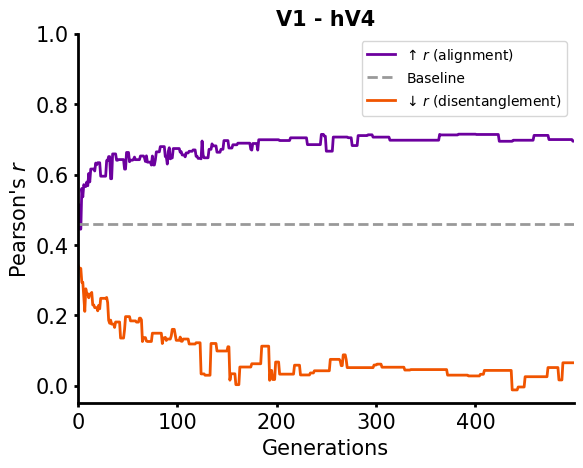

In [ ]:
# Get the evaluation subjects' RSMs RSA scores for the controlling images
align_score_eval = evaluate(best_batches_align, rsm_eval_roi_1, rsm_eval_roi_2)
disentangle_score_eval = evaluate(best_batches_disentangle, rsm_eval_roi_1,
    rsm_eval_roi_2)

# Get the evaluation subjects' RSMs RSA scores for the baseline images
baseline_imgs = np.reshape(null_dist_images[idx_baseline], (1, -1))
baseline_score_eval = evaluate(baseline_imgs, rsm_eval_roi_1, rsm_eval_roi_2)[0]

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(108/255, 0/255, 158/255), (153/255, 153/255, 153/255),
	(240/255, 84/255, 0/255)]

# Plot the results
plt.figure()
# Plot the alignment scores across generations
x = np.arange(generations)
plt.plot(x, align_score_eval, linewidth=2, color=colors[0])
# Plot the null distribution baseline scores
plt.plot([min(x), max(x)], [baseline_score_eval, baseline_score_eval], '--',
    linewidth=2, color=colors[1])
# Plot the disentanglement scores across generations
plt.plot(x, disentangle_score_eval, linewidth=2, color=colors[2])
# Title
title = roi_1 + ' - ' + roi_2
plt.title(title, fontsize=fontsize, weight='bold')
# x-axis
plt.xlabel('Generations', fontsize=fontsize)
plt.xlim(min(x), max(x))
# y-axis
plt.ylabel('Pearson\'s $r$', fontsize=fontsize)
plt.ylim(bottom=-.05, top=1)

# Legend
legend = [
    '↑ $r$ (alignment)',
    'Baseline',
    '↓ $r$ (disentanglement)'
    ]
plt.legend(legend, loc=0, ncol=1, fontsize=10, markerscale=.5);

## 2.6 | Visualize the controlling images

Finally, here you will visualize the controlling images from the last genetic optimization generation, for the two neural control conditions.

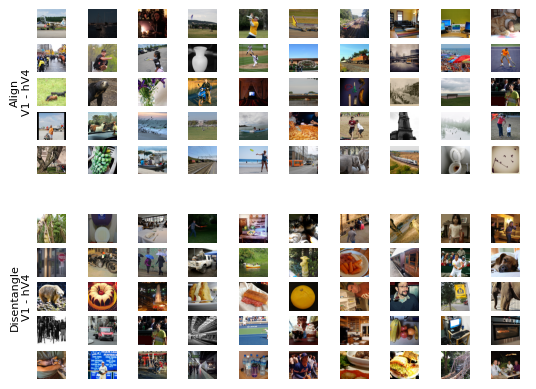

In [ ]:
# Access the image sets
if imageset == 'nsd':
    imageset_dir = os.path.join(ned_dir,
        'pregenerated_insilico_neural_responses', 'imagesets', 'imageset-nsd',
        'nsd_stimuli.hdf5')
    images = h5py.File(imageset_dir, 'r')
    images = images.get('imgBrick')
elif imageset == 'imagenet_val':
    imageset_dir = os.path.join(ned_dir,
        'pregenerated_insilico_neural_responses', 'imagesets',
        'imageset-imagenet_val')
    images = torchvision.datasets.ImageNet(root=imageset_dir, split='val')
elif imageset == 'things':
    images = metadata['things_labels']['image_paths']

# Function to load the selected image
def load_img(imageset, images, img_idx):
    if imageset == 'nsd':
        img = images[img_idx]
    elif imageset == 'imagenet_val':
        img, _ = images.__getitem__(img_idx)
        transform = trn.Compose([trn.CenterCrop(min(img.size))])
        img = transform(img)
    elif imageset == 'things':
        img_dir = os.path.join(ned_dir,
            'pregenerated_insilico_neural_responses', 'imagesets',
            'imageset-things', 'images', images[img_idx])
        img = Image.open(img_dir).convert('RGB')
    return img

# Plot parameters
fontsize = 8
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.bottom'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

# Create the row/column image indices
if n_images_per_batch < 10:
    columns = n_images_per_batch
else:
    columns = 10
rows_per_condition = int(np.ceil(n_images_per_batch / columns))
align_rows = np.arange(rows_per_condition)
disentangle_rows = align_rows + rows_per_condition + 1
tot_rows = 2 * rows_per_condition + 1

# Plot the images
fig, axs = plt.subplots(tot_rows, columns)
idx = 0
for r in range(rows_per_condition):
    for c in range(columns):
        # Aligning images
        img = load_img(imageset, images,
            idx_all_imgs[idx_used_imgs[best_batches_align[-1,idx]]])
        axs[align_rows[r],c].imshow(img)
        # Disentangling images
        img = load_img(imageset, images,
            idx_all_imgs[idx_used_imgs[best_batches_disentangle[-1,idx]]])
        axs[disentangle_rows[r],c].imshow(img)
        idx += 1
# Remove ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
# y-labels
axs[int(np.median(align_rows)),0].set_ylabel('Align\n'+roi_1+' - '+roi_2);
axs[int(np.median(disentangle_rows)),0].set_ylabel(
    'Disentangle\n'+roi_1+' - '+roi_2);